<a href="https://colab.research.google.com/github/francescopatane96/codon_usage_optimization/blob/main/codon_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data mining and preprocessing

In [ ]:
pip install Bio

In [ ]:
from Bio.PDB import *


# search rare codons


In [ ]:
rare_codons = ["UUC",
               "CUG", "CUA", "CUC",
               "AUC",
               "GUG", "GUC",
               "UCG", "UCC",
               "CCG", "CCC",
               "ACG", "ACC",
               "GCG",
               "UAC",
               "CAC",
               "CAG",
               "AAC",
               "AAG",
               "GAC",
               "GAG",
               "UGC",
               "CGG", "CGA", "CGC", "CGU",
               "AGC",
               "GGC", "GGG"]

In [ ]:
# ENA|K02194|K02194.1 Plasmodium falciparum circumsporozoite (CS) protein gene, complete cds.
mrna = "AUGAUGAGAAAAUUAGCUAUUUUAUCUGUUUCUUCCUUUUUAUUUGUUGAGGCCUUAUUCCAGGAAUACCAGUGCUAUGGAAGUUCGUCAAACACAAGGGUUCUAAAUGAAUUAAAUUAUGAUAAUGCAGGCACUAAUUUAUAUAAUGAAUUAGAAAUGAAUUAUUAUGGGAAACAGGAAAAUUGGUAUAGUCUUAAAAAAAAUAGUAGAUCACUUGGAGAAAAUGAUGAUGGAAAUAAUAAUAAUGGAGAUAAUGGUCGUGAAGGUAAAGAUGAAGAUAAAAGAGAUGGAAAUAACGAAGACAACGAGAAAUUAAGGAAACCAAAACAUAAAAAAUUAAAGCAACCAGGGGAUGGUAAUCCUGAUCCAAAUGCAAACCCAAAUGUAGAUCCCAAUGCCAACCCAAAUGUAGAUCCAAAUGCAAACCCAAAUGUAGAUCCAAAUGCAAACCCAAAUGCAAACCCAAAUGCAAACCCAAAUGCAAACCCAAAUGCAAACCCAAAUGCAAACCCAAAUGCAAACCCAAAUGCAAACCCAAAUGCAAACCCCAAUGCAAAUCCUAAUGCAAAUCCUAAUGCAAACCCAAAUGCAAAUCCUAAUGCAAACCCAAAUGCAAACCCAAACGUAGAUCCUAAUGCAAAUCCAAAUGCAAACCCAAAUGCAAACCCAAACGCAAACCCCAAUGCAAAUCCUAAUGCAAACCCCAAUGCAAAUCCUAAUGCAAAUCCUAAUGCCAAUCCAAAUGCAAAUCCAAAUGCAAACCCAAACGCAAACCCCAAUGCAAAUCCUAAUGCCAAUCCAAAUGCAAAUCCAAAUGCAAACCCAAAUGCAAACCCAAAUGCAAACCCCAAUGCAAAUCCUAAUAAAAACAAUCAAGGUAAUGGACAAGGUCACAAUAUGCCAAAUGACCCAAACCGAAAUGUAGAUGAAAAUGCUAAUGCCAACAAUGCUGUAAAAAAUAAUAAUAACGAAGAACCAAGUGAUAAGCACAUAGAACAAUAUUUAAAGAAAAUAAAAAAUUCUAUUUCAACUGAAUGGUCCCCAUGUAGUGUAACUUGUGGAAAUGGUAUUCAAGUUAGAAUAAAGCCUGGCUCUGCUAAUAAACCUAAAGACGAAUUAGAUUAUGAAAAUGAUAUUGAAAAAAAAAUUUGUAAAAUGGAAAAAUGUUCCAGUGUGUUUAAUGUCGUAAAUAGUUCAAUAGGAUUAAUAAUGGUAUUAUCCUUCUUGUUCCUUAAU"

In [ ]:
from Bio.Seq import Seq



# Traduzione della sequenza di amminoacidi in una sequenza di proteine
protein = Seq(mrna).translate()

# Stampa la sequenza di proteine tradotta
print(protein)


MMRKLAILSVSSFLFVEALFQEYQCYGSSSNTRVLNELNYDNAGTNLYNELEMNYYGKQENWYSLKKNSRSLGENDDGNNNNGDNGREGKDEDKRDGNNEDNEKLRKPKHKKLKQPGDGNPDPNANPNVDPNANPNVDPNANPNVDPNANPNANPNANPNANPNANPNANPNANPNANPNANPNANPNANPNANPNANPNANPNANPNVDPNANPNANPNANPNANPNANPNANPNANPNANPNANPNANPNANPNANPNANPNANPNANPNANPNANPNANPNANPNKNNQGNGQGHNMPNDPNRNVDENANANNAVKNNNNEEPSDKHIEQYLKKIKNSISTEWSPCSVTCGNGIQVRIKPGSANKPKDELDYENDIEKKICKMEKCSSVFNVVNSSIGLIMVLSFLFLN


In [ ]:
sec_struc = '--HHHHHHHHHHHHHHH----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------EEE---------------------EEEE------EEEEE-----HHHHHHHHH--'

In [ ]:
def create_dashed_regions(sec_structure):
    dashed_regions_H = []
    dashed_regions_E = []
    current_start = None
    for i, sec in enumerate(sec_structure):
        if sec == 'H':
            if current_start is None:
                current_start = i
        elif sec == 'E':
            if current_start is not None:
                dashed_regions_E.append((current_start, i))
                current_start = None
        else:
            if current_start is not None:
                dashed_regions_H.append((current_start, i))
                current_start = None
    if current_start is not None:
        if sec_structure[-1] == 'H':
            dashed_regions_H.append((current_start, len(sec_structure)))
        elif sec_structure[-1] == 'E':
            dashed_regions_E.append((current_start, len(sec_structure)))
    return dashed_regions_H, dashed_regions_E


In [ ]:
def create_dashed_regions(sec_structure):
    dashed_regions_H = []
    dashed_regions_E = []
    current_start = None
    for i, sec in enumerate(sec_structure):
        if sec == 'H':
            if current_start is None:
                current_start = i
        elif sec == 'E':
            if current_start is not None:
                dashed_regions_H.append((current_start, i))
                current_start = None
            dashed_regions_E.append((i, i+1))
        else:
            if current_start is not None:
                dashed_regions_H.append((current_start, i))
                current_start = None
    if current_start is not None:
        dashed_regions_H.append((current_start, len(sec_structure)))
    return dashed_regions_H, dashed_regions_E


In [ ]:
H, E =create_dashed_regions(sec_struc)

In [ ]:
import numpy as np

catch = np.arange(0, len(mrna), 3)

In [ ]:
#catch = catch//3

TypeError: ignored

In [ ]:
aa_pos = []


for i in catch//3:
  codon = mrna[i:i+3]
  if codon in rare_codons:
    aa_pos.append(i+1)

In [ ]:
aa_pos

[6,
 15,
 17,
 24,
 26,
 30,
 33,
 34,
 49,
 51,
 58,
 59,
 61,
 67,
 68,
 70,
 72,
 73,
 75,
 81,
 84,
 85,
 86,
 87,
 91,
 93,
 96,
 98,
 101,
 103,
 126,
 128,
 130,
 132,
 134,
 169,
 173,
 175,
 191,
 210,
 212,
 218,
 248,
 257,
 258,
 259,
 260,
 263,
 269,
 275,
 282,
 284,
 295,
 296,
 297,
 299,
 301,
 304,
 305,
 306,
 307,
 315,
 320,
 321,
 326,
 340,
 341,
 344,
 345,
 347,
 349,
 350,
 359,
 360,
 362,
 365,
 366,
 372,
 376,
 377,
 378,
 389,
 390,
 391,
 396,
 400,
 401,
 402]

In [ ]:
len(aa_pos)

11

random mapping of len(aa_pos) rare codons

In [ ]:
catch = list(catch)

In [ ]:
import random

random_mapping = random.sample(catch, 88)


In [ ]:
random_mapping

[235,
 99,
 215,
 60,
 122,
 159,
 87,
 68,
 137,
 24,
 403,
 16,
 143,
 172,
 250,
 256,
 267,
 230,
 149,
 262,
 104,
 383,
 291,
 259,
 384,
 214,
 97,
 350,
 129,
 127,
 346,
 179,
 257,
 319,
 309,
 402,
 134,
 246,
 26,
 264,
 283,
 361,
 101,
 67,
 308,
 352,
 11,
 185,
 160,
 80,
 145,
 130,
 260,
 64,
 189,
 236,
 108,
 385,
 105,
 86,
 163,
 188,
 47,
 341,
 313,
 45,
 142,
 303,
 263,
 77,
 321,
 218,
 48,
 65,
 156,
 395,
 345,
 374,
 406,
 265,
 18,
 365,
 409,
 390,
 173,
 6,
 23,
 357]

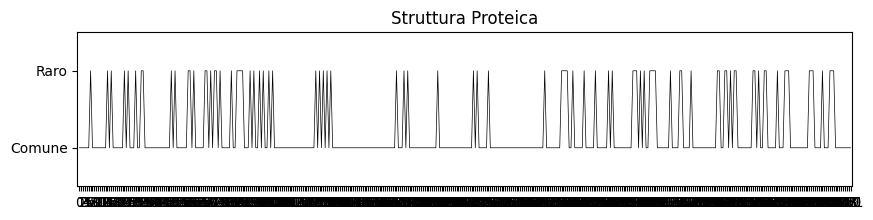

In [ ]:
import matplotlib.pyplot as plt

def plot_protein_structure(sequence, rare_positions):
    # Preparazione dati per il grafico
    x = range(len(mrna)//3)
    y = [1 if i in aa_pos else 0 for i in x]

    # Creazione del grafico
    plt.figure(figsize=(10, 2))
    plt.plot(x, y, color='black', linewidth=0.5)
    plt.xlim(-1, len(mrna)//3)
    plt.ylim(-0.5, 1.5)
    plt.xticks(x)
    plt.yticks([0, 1], ['Comune', 'Raro'])
    plt.title('Struttura Proteica')

    # Etichettatura delle posizioni
   # for i, aa in enumerate(sequence):
      #  plt.text(i, 0.5, aa, ha='center', va='center', fontsize=12, fontweight='bold')

    # Mostrare il grafico
    plt.show()

# Esempio di utilizzo

plot_protein_structure(mrna, aa_pos)


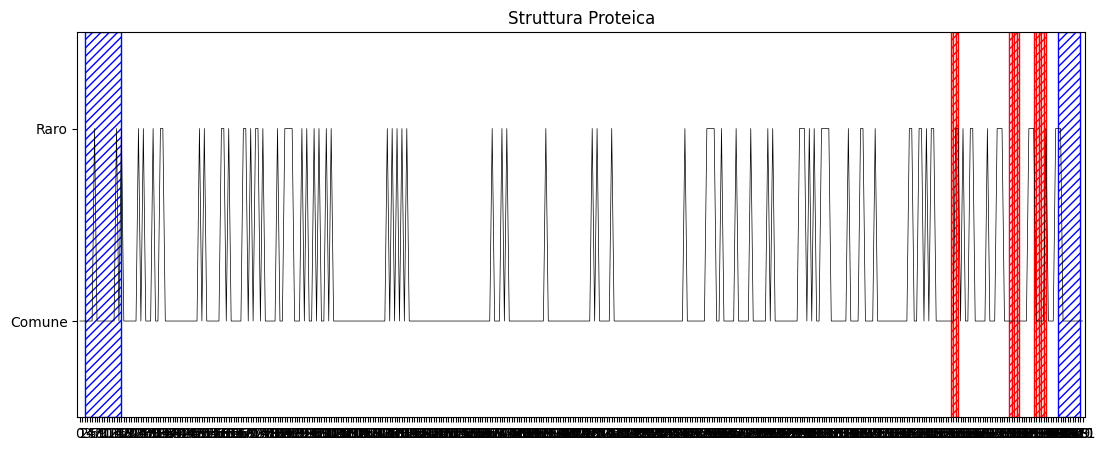

In [ ]:
import matplotlib.pyplot as plt

def plot_protein_structure(sequence, rare_positions, sec_struc, H, E):
    # Preparazione dati per il grafico
    x = range(len(sequence)//3)
    y = [1 if i in rare_positions else 0 for i in x]

    # Creazione del grafico
    plt.figure(figsize=(13, 5))
    plt.plot(x, y, color='black', linewidth=0.5)
    plt.xlim(-1, len(sequence)//3)
    plt.ylim(-0.5, 1.5)
    plt.xticks(x)
    plt.yticks([0, 1], ['Comune', 'Raro'])
    plt.title('Struttura Proteica')

    # Colorazione delle linee in base alla struttura secondaria

    # Aggiunta delle linee tratteggiate verticali nelle regioni specificate
    for region in H:
        start, end = region
        plt.axvspan(start, end, facecolor='white', edgecolor='blue', hatch='////')
    for region in E:
        start, end = region
        plt.axvspan(start, end, facecolor='white', edgecolor='red', hatch='////')

        

   

    # Mostrare il grafico
    plt.show()

# Esempio di utilizzo

plot_protein_structure(mrna, aa_pos, sec_struc, H, E)


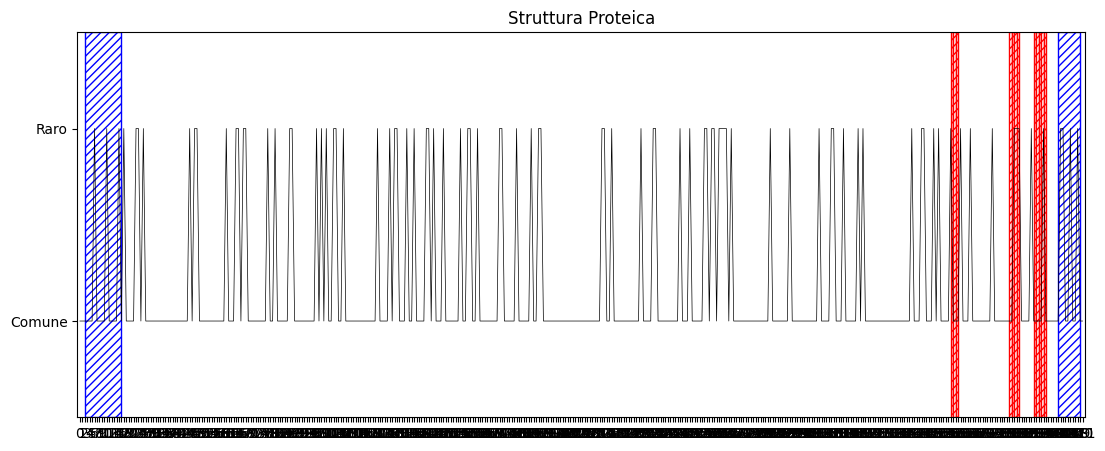

In [ ]:
import matplotlib.pyplot as plt

def plot_protein_structure(sequence, random_mapping, sec_struc, H, E):
    # Preparazione dati per il grafico
    x = range(len(sequence)//3)
    y = [1 if i in random_mapping else 0 for i in x]

    # Creazione del grafico
    plt.figure(figsize=(13, 5))
    plt.plot(x, y, color='black', linewidth=0.5)
    plt.xlim(-1, len(sequence)//3)
    plt.ylim(-0.5, 1.5)
    plt.xticks(x)
    plt.yticks([0, 1], ['Comune', 'Raro'])
    plt.title('Struttura Proteica')

    # Colorazione delle linee in base alla struttura secondaria

    # Aggiunta delle linee tratteggiate verticali nelle regioni specificate
    for region in H:
        start, end = region
        plt.axvspan(start, end, facecolor='white', edgecolor='blue', hatch='////')
    for region in E:
        start, end = region
        plt.axvspan(start, end, facecolor='white', edgecolor='red', hatch='////')

        

   

    # Mostrare il grafico
    plt.show()

# Esempio di utilizzo

plot_protein_structure(mrna, random_mapping, sec_struc, H, E)


catch positions at protein level

In [ ]:
parser = PDBParser()

structure = parser.get_structure("CSP_full", "CSP_full.pdb")

FileNotFoundError: ignored

In [ ]:
pip install nglview

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
import nglview as nv

view = nv.show_biopython(structure)
view

NGLWidget()

In [ ]:
ppb = PPBuilder()
for pp in ppb.build_peptides(structure):
  print(pp.get_sequence())

MMRKLAILSVSSFLFVEALFQEYQCYGSSSNTRVLNELNYDNAGTNLYNELEMNYYGKQENWYSLKKNSRSLGENDDGNNNNGDNGREGKDEDKRDGNNEDNEKLRKPKHKKLKQPGDGNPDPNANPNVDPNANPNVDPNANPNVDPNANPNANPNANPNANPNANPNANPNANPNANPNANPNANPNANPNANPNANPNANPNANPNVDPNANPNANPNANPNANPNANPNANPNANPNANPNANPNANPNANPNANPNANPNANPNANPNANPNANPNANPNANPNKNNQGNGQGHNMPNDPNRNVDENANANNAVKNNNNEEPSDKHIEQYLKKIKNSISTEWSPCSVTCGNGIQVRIKPGSANKPKDELDYENDIEKKICKMEKCSSVFNVVNSSIGLIMVLSFLFLN


In [ ]:
from Bio.PDB import Selection
res_list = Selection.unfold_entities(structure, 'R')

In [ ]:
res_list  #aa_pos

Analysis